In [1]:
#Example 1

In [2]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM

estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

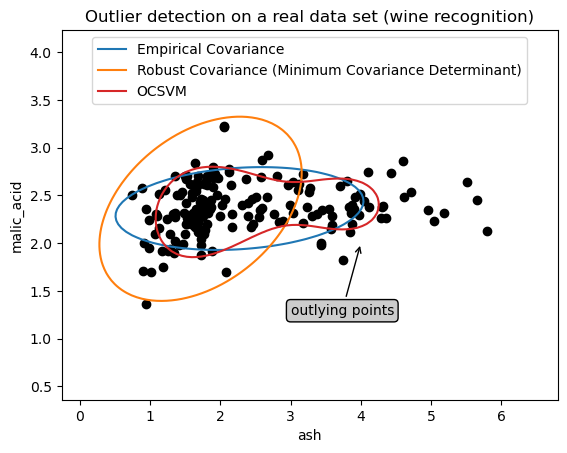

In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

X = load_wine()["data"][:, [1, 2]]  # two clusters

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

In [4]:
#Example 2

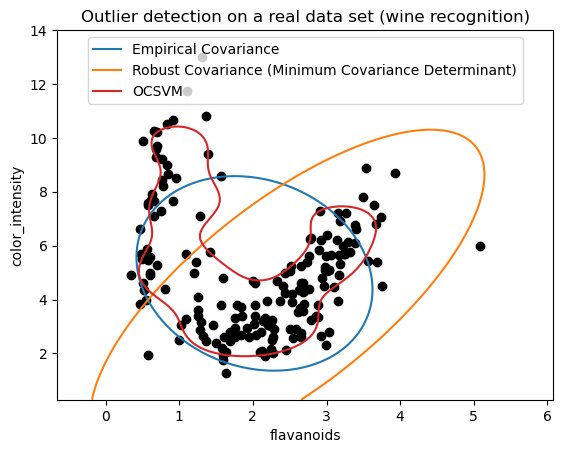

In [5]:
X = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
ax.legend(handles=legend_lines, loc="upper center")
ax.set(
    xlabel="flavanoids",
    ylabel="color_intensity",
    title="Outlier detection on a real data set (wine recognition)",
)

plt.show()